<a href="https://colab.research.google.com/github/mayurgite/appliedAI/blob/master/LSTM_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment : 14

<pre>
1. You can work with preprocessed_data.csv for the assignment. You can get the data from - <a href='https://drive.google.com/drive/u/0/folders/1CJnItndeSSJu7aragQoXWZS9-0apN6pp'>Data folder </a>
2. Load the data in your notebook.
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a  href='https://stackoverflow.com/a/46844409'>this</a> and <a  href='https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum.
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in a separate pad and write your observations about them.
8. Make sure that you are using GPU to train the given models.
</pre>

In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [120]:
import pandas as pd
import numpy as np

In [80]:
#you can use gdown modules to import dataset for the assignment
#for importing any file from drive to Colab you can write the syntax as !gdown --id file_id
#you can run the below cell to import the required preprocessed data.csv file and glove vector

In [81]:
#!gdown --id 1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-
#!gdown --id 1pGd5tLwA30M7wkbJKdXHaae9tYVDICJ_

## <font color='red'> Model-1 </font>
Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [82]:
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
#input_layer = Input(shape=(n,))
#embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
#flatten = Flatten()(embedding)

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

# <font color='red'> Model-1 </font>

In [121]:
# import all the libraries
#make sure that you import your libraries from tf.keras and not just keras
import tensorflow
from tensorflow import keras
from keras.layers import Input,Dense,LSTM

In [148]:
#read the csv file
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/AppliedAI/Assignment-13/preprocessed_data.csv', )

df.head(1)

# Categorical features - school_state, teacher_prefix, project_grade_category, clean_categories, clean_subcategories
# Numerica features - teacher_number_of_previously_posted_projects
# Text - essay
# Target - project_is_approved

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [149]:
# perform stratified train test split on the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['project_is_approved']), df['project_is_approved'], 
                                                    stratify = df['project_is_approved'],test_size = 0.3)

print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape = {y_test.shape}')

X_train.shape = (76473, 8)
X_test.shape = (32775, 8)
y_train.shape = (76473,)
y_test.shape = (32775,)


In [150]:
from keras.utils import np_utils
def get_categorical(y_train, number_of_unique_classes):
    Y_train = []

    for class_ in y_train:
        class__ = np_utils.to_categorical(class_, number_of_unique_classes) 
        Y_train.append(class__)
    Y_train = np.array(Y_train)
    return Y_train

y_train = get_categorical(y_train, 2)
y_test = get_categorical(y_test, 2)

## 1.1 Text Vectorization

In [151]:
#since the data is already preprocessed, we can directly move to vectorization part
#first we will vectorize the text data
#for vectorization of text data in deep learning we use tokenizer, you can go through below references
# https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html
#https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do
# after text vectorization you should get train_padded_docs and test_padded_docs

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

num_words = 1000
oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'

# Get max training sequence length
maxlen = 350 # max([len(x) for x in train_sequences])

In [152]:
def tokenize_text(text_data):
  # Tokenize our training data
  tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
  tokenizer.fit_on_texts(text_data)

  # Get our training data word index
  word_index = tokenizer.word_index

  # Encode training data sentences into sequences
  train_sequences = tokenizer.texts_to_sequences(text_data)

  # Pad the training sequences
  train_padded = pad_sequences(train_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

  return train_padded, word_index

# Tokenize text feature in X_train & X_test
train_padded_docs, word_index_train = tokenize_text(X_train['essay'])
test_padded_docs, word_index_test = tokenize_text(X_test['essay'])

# Vocab size variable
vocab_size_train = len(word_index_train) + 1
vocab_size_test = len(word_index_test) + 1

# Output the results of our work
print("\nPadded X_train sequences:\n", train_padded_docs[0])
print("\nPadded training shape:", train_padded_docs.shape)
print("Padded test shape:", test_padded_docs.shape)


Padded X_train sequences:
 [  8   2 395   7  45 502   1 817  11   5   2 121  53 608 307 357  53 284
 748   6   4 260 311 142   2   1 268   8   2   7 662   6  20  70   8   2
  23   4  91  11 143 576  26   4  64 186   1   2 141 475  40  15  90   1
   4  51   1  65 151 942  79  72  40   7 511  80 211 255   1  53 797 133
 179   1 871 645  25  44  45  37  43  30  25  29  44  21   1 303 189  39
   1 871 645   1 871 296   2 152 255   1 871 152  38 536  36   2 871   1
  43  16 123 462  52  44   2 101 840 181   6  45 189   1 871 525 501   1
  45 189   7  14   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   

In [153]:
# Vocab size variable
vocab_size_train = len(word_index_train) + 1
vocab_size_test = len(word_index_test) + 1

print(f'vocab_size_train = {vocab_size_train}')
print(f'vocab_size_test  = {vocab_size_test}')

vocab_size_train = 49035
vocab_size_test  = 35412


In [154]:
#after getting the padded_docs you have to use predefined glove vectors to get 300 dim representation for each word
# we will be storing this data in form of an embedding matrix and will use it while defining our model
# Please go through following blog's 'Example of Using Pre-Trained GloVe Embedding' section to understand how to create embedding matrix
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

from numpy import array
from numpy import asarray
from numpy import zeros

from keras.layers import Flatten
from keras.layers import Embedding

In [155]:
# load the whole embedding into memory
import pickle

embeddings_index = dict()

with open('/content/drive/MyDrive/AppliedAI/Assignment-13/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())
  
for word in glove_words: # for each word in a review/sentence
  coefs = asarray(model[word], dtype='float32')
  embeddings_index[word] = coefs

print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 51510 word vectors.


In [156]:
# create a weight matrix for words in training docs

def create_weight_matrix(vocab_size, word_dict):
  embedding_matrix = zeros((vocab_size, 300))
  
  for word, i in word_dict:
    embedding_vector = embeddings_index.get(word)

    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector
    
  return embedding_matrix

emb_mat_train = create_weight_matrix(vocab_size_train, word_index_train.items())
emb_mat_test = create_weight_matrix(vocab_size_test, word_index_test.items())

print(f'emb_mat_train = {emb_mat_train[0]}')

emb_mat_train = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [157]:
count = 0
for i in emb_mat_train:
  if i.sum() == 0:
    count += 1
print(f'Number of words which are not present in glove vector = {count}')

Number of words which are not present in glove vector = 4963


## 1.2 Categorical feature Vectorization

In [132]:
# for model 1 and model 2, we have to assign a unique number to each feature in a particular categorical column.
# you can either use tokenizer,label encoder or ordinal encoder to perform the task
# label encoder gives an error for 'unseen values' (values present in test but not in train)
# handle unseen values with label encoder - https://stackoverflow.com/a/56876351
# ordinal encoder also gives error with unseen values but you can use modify handle_unknown parameter
# documentation of ordianl encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
# after categorical feature vectorization you will have column_train_data and column_test_data.


In [158]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

def encode_cat(fetaure):
    ordinal = OrdinalEncoder(handle_unknown = 'use_encoded_value')
    ordinal_out = ordinal.set_params(unknown_value=-1).fit_transform(fetaure)
    
    return ordinal_out

school_state_enc = encode_cat(X_train[['school_state']])
teacher_pre_enc = encode_cat(X_train[['teacher_prefix']])
project_grade_enc = encode_cat(X_train[['project_grade_category']])
clean_categories_enc = encode_cat(X_train[['clean_categories']])
clean_subcategories_enc = encode_cat(X_train[['clean_subcategories']])

In [159]:
school_state_enc_test = encode_cat(X_test[['school_state']])
teacher_pre_enc_test = encode_cat(X_test[['teacher_prefix']])
project_grade_enc_test = encode_cat(X_test[['project_grade_category']])
clean_categories_enc_test = encode_cat(X_test[['clean_categories']])
clean_subcategories_enc_test = encode_cat(X_test[['clean_subcategories']])

In [160]:
print(len(X_train['school_state'].unique())) # 50
print(len(X_train['teacher_prefix'].unique()))
print(len(X_train['project_grade_category'].unique()))
print(len(X_train['clean_categories'].unique()))
print(len(X_train['clean_subcategories'].unique()))

51
5
4
50
390


In [161]:
import math

def get_emd_size_for_cat_features(feature):
  return math.floor(min(50, len(df[feature].unique())+1/ 2))

In [162]:
# m is the no of categories per feature
emd_school_state_size = get_emd_size_for_cat_features('school_state')
emd_teacher_prefix_size = get_emd_size_for_cat_features('teacher_prefix')
emd_project_grade_category_size = get_emd_size_for_cat_features('project_grade_category')
emd_clean_categories_size = get_emd_size_for_cat_features('clean_categories')
emd_clean_subcategories_size = get_emd_size_for_cat_features('clean_subcategories')

In [163]:
print(f'emd_school_state_size = {emd_school_state_size}')
print(f'emd_teacher_prefix_size = {emd_teacher_prefix_size}')
print(f'emd_project_grade_category_size = {emd_project_grade_category_size}')
print(f'emd_clean_categories_size = {emd_clean_categories_size}')
print(f'emd_clean_subcategories_size = {emd_clean_subcategories_size}')

emd_school_state_size = 50
emd_teacher_prefix_size = 5
emd_project_grade_category_size = 4
emd_clean_categories_size = 50
emd_clean_subcategories_size = 50


## 1.3 Numerical feature Vectorization

In [139]:
# you have to standardise the numerical columns
# stack both the numerical features
#after numerical feature vectorization you will have numerical_data_train and numerical_data_test

In [164]:
from sklearn.preprocessing import StandardScaler

def encode_numeric(num_feature):
    std_scalar = StandardScaler()
    scaled = std_scalar.fit_transform(num_feature)
    
    return scaled
    
price_scaled = encode_numeric(X_train[['price']])
prev_posted_scaled = encode_numeric(X_train[['teacher_number_of_previously_posted_projects']])

# Concat numeric features
num_feat_concat = np.hstack((price_scaled,prev_posted_scaled))

In [165]:
price_scaled_test = encode_numeric(X_test[['price']])
prev_posted_scaled_test = encode_numeric(X_test[['teacher_number_of_previously_posted_projects']])

# Concat numeric features
num_feat_concat_test = np.hstack((price_scaled_test, prev_posted_scaled_test))

In [142]:
#input_num = keras.Input(shape=(2,), dtype=tensorflow.float32)
#out_num_1_dense = keras.layers.Dense(1)(num_feat_concat)

## 1.4 Defining the model

<img src='https://i.imgur.com/w395Yk9.png'>

In [143]:
# as of now we have vectorized all our features now we will define our model.
# as it is clear from above image that the given model has multiple input layers and hence we have to use functional API
# Please go through - https://keras.io/guides/functional_api/
# it is a good programming practise to define your complete model i.e all inputs , intermediate and output layers at one place.
# while defining your model make sure that you use variable names while defining any length,dimension or size.
#for ex.- you should write the code as 'input_text = Input(shape=(pad_length,))' and not as 'input_text = Input(shape=(300,))'
# the embedding layer for text data should be non trainable
# the embedding layer for categorical data should be trainable
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
# https://towardsdatascience.com/deep-embeddings-for-categorical-variables-cat2vec-b05c8ab63ac0
#print model.summary() after you have defined the model
#plot the model using utils.plot_model module and make sure that it is similar to the above image

In [167]:
def auc_fun( y_true, y_pred ) :
    score = tensorflow.py_function( lambda y_true, y_pred : roc_auc_score( y_true, y_pred, average='macro', sample_weight=None).astype('float32'),
                        [y_true, y_pred],
                        'float32',
                        #stateful=True,
                        name='sklearnAUC' )
    return score


In [174]:
from keras.layers import Embedding, SpatialDropout1D
from keras.initializers import he_normal
from keras.regularizers import l2
from keras.layers import LeakyReLU

# input_length - max sentence length
# vocab_size_train - number of words in vocabulory
# dim = 300 - dimension of word

# train_padded_docs, school_state_enc, teacher_pre_enc, project_grade_enc, clean_categories_enc, clean_subcategories_enc

# Input - 1
input1 = keras.Input(shape=(350,), name = 'Text input')

# With Embedding() we are converting 
x1 = Embedding(vocab_size_train, 300, weights = [emb_mat_train], input_length = maxlen, trainable = False)(input1)
x1 = SpatialDropout1D(0.2)(x1)
x1 = keras.layers.LSTM(32,)(x1)
x1 = keras.layers.Flatten()(x1)

# Input - 2
input2 = Input(shape=(1,), name = 'school state input')
x2 = Embedding(input_dim = 51, output_dim = 50)(input2)
x2 = Flatten()(x2)

# Input - 3
input3 = Input(shape=(1,), name = 'teacher prev input')
x3 = Embedding(input_dim = 5, output_dim = 5)(input3)
x3 = Flatten()(x3)

# Input - 4
input4 = Input(shape=(1,), name = 'project grade input')
x4 = Embedding(input_dim = 4, output_dim = 4)(input4)
x4 = Flatten()(x4)

# Input - 5
input5 = Input(shape=(1,), name = 'clean categories input')
x5 = Embedding(input_dim = 51, output_dim = 50)(input5)
x5 = Flatten()(x5)

# Input - 6
input6 = Input(shape=(1,), name = 'clean subcategories input')
x6 = Embedding(input_dim = 393, output_dim = 50)(input6)
x6 = Flatten()(x6)

# Input - 7
input7 = Input(shape=(2,), name = 'numeric inputs - 2 features')
x7 = keras.layers.Dense(16, activation = 'relu', kernel_initializer = he_normal(), )(input7)#kernel_regularizer = l2(0.0001)
x7 = LeakyReLU()(x7)

In [175]:
from tensorflow.python.keras.callbacks import TensorBoard, ModelCheckpoint
from time import time

concat = keras.layers.Concatenate()([x1,x2,x3,x4,x5,x6,x7])

x = keras.layers.Dense(64, kernel_initializer=he_normal())(concat)#,kernel_regularizer=l2(0.0001)
x = keras.layers.Dropout(0.2)(x)
x = LeakyReLU()(x)
x = keras.layers.Dense(128, kernel_initializer=he_normal(),)(x)#kernel_regularizer=l2(0.0001)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
x = LeakyReLU()(x)
x = keras.layers.Dense(32, kernel_initializer=he_normal())(x)#,kernel_regularizer=l2(0.0001)
x = keras.layers.Dropout(0.2)(x)
x = LeakyReLU()(x)

output = keras.layers.Dense(2, activation = 'softmax')(x)

# create model with seven inputs
model = keras.Model([input1, input2, input3, input4, input5, input6, input7], output)

tensorboard = TensorBoard(log_dir='/content/drive/MyDrive/AppliedAI/Assignments/LSTM_Assignment/lstm_model_1/{}'.format(time()))

## 1.5 Compiling and fititng your model

In [176]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = keras.optimizers.Adam(), #decay = 1e-4,learning_rate=0.0006
              metrics = ['accuracy', auc_fun]) # auroc

print(model.summary())

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Text input (InputLayer)        [(None, 350)]        0           []                               
                                                                                                  
 embedding_48 (Embedding)       (None, 350, 300)     14710500    ['Text input[0][0]']             
                                                                                                  
 school state input (InputLayer  [(None, 1)]         0           []                               
 )                                                                                                
                                                                                                  
 teacher prev input (InputLayer  [(None, 1)]         0           []                         

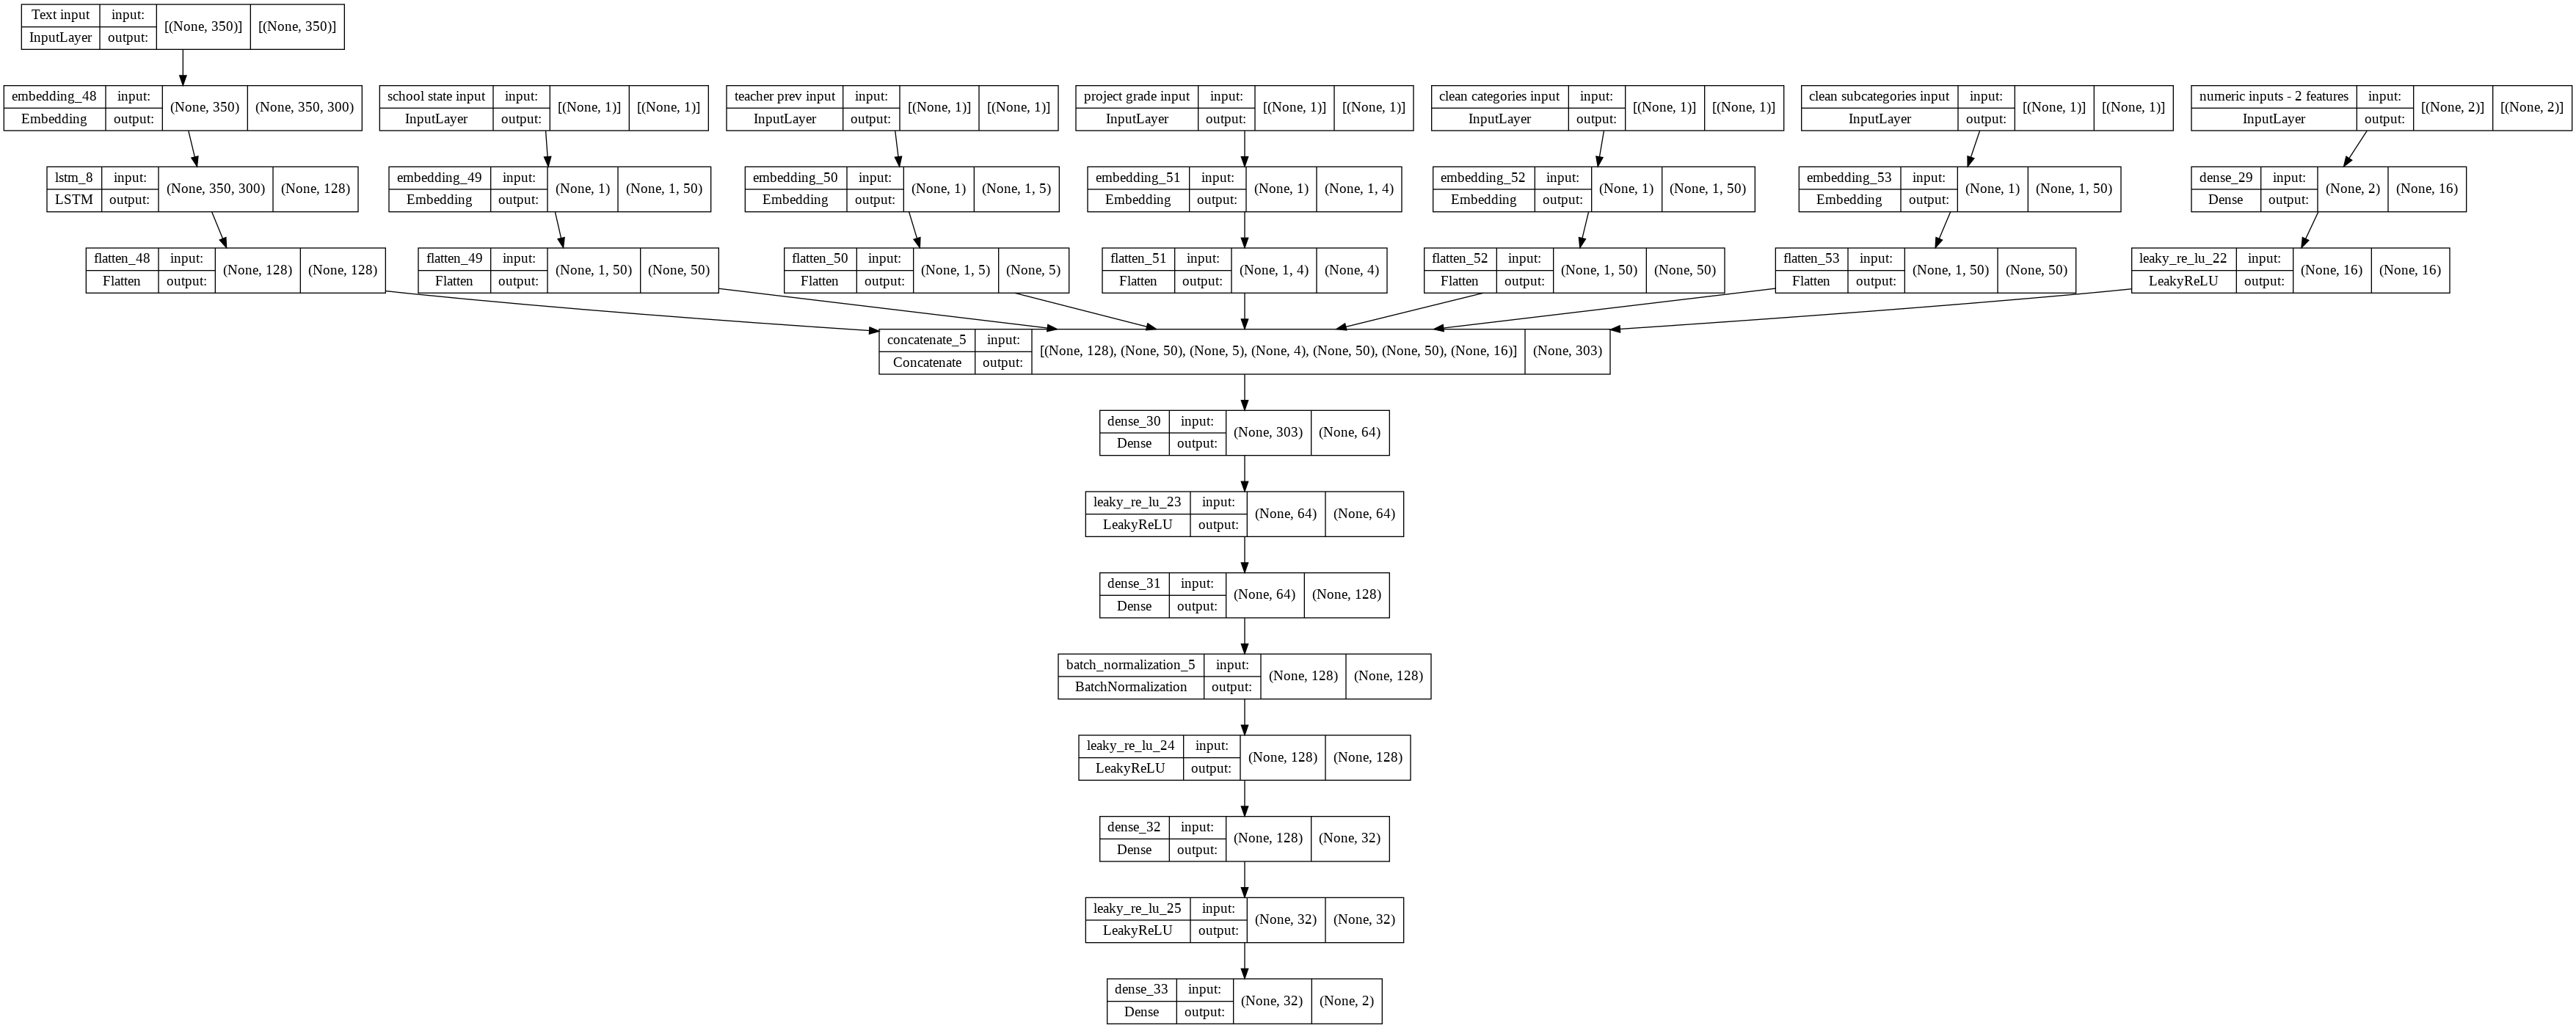

In [177]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='/content/drive/MyDrive/AppliedAI/Assignmentsmodel_1.png', show_shapes=True, show_layer_names=True)

In [ ]:
#define custom auc as metric , do not use tf.keras.metrics
# https://stackoverflow.com/a/46844409 - custom AUC reference 1
# https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807  - custom AUC reference 2
# compile and fit your model

#model fitting
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/

filepath="/content/drive/MyDrive/AppliedAI/Assignments/LSTM_Assignment/lstm_assign_model_1.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,tensorboard]

model.fit(x = [train_padded_docs, school_state_enc, teacher_pre_enc, project_grade_enc,clean_categories_enc, clean_subcategories_enc, 
           num_feat_concat], y = y_train, epochs = 100, verbose = 1, batch_size = 128,
           validation_data = ([test_padded_docs, school_state_enc_test, teacher_pre_enc_test, project_grade_enc_test,clean_categories_enc_test, 
                    clean_subcategories_enc_test, num_feat_concat_test], y_test),
           callbacks = callbacks_list)

Epoch 1/100
598/598 [==============================] - ETA: 0s - loss: 0.4259 - accuracy: 0.8439 - auc_fun: 0.5960
Epoch 00001: val_accuracy improved from -inf to 0.84857, saving model to /content/drive/MyDrive/AppliedAI/Assignments/LSTM_Assignment/lstm_assign_model_1.hdf5
598/598 [==============================] - 32s 48ms/step - loss: 0.4259 - accuracy: 0.8439 - auc_fun: 0.5960 - val_loss: 0.4213 - val_accuracy: 0.8486 - val_auc_fun: 0.5857
Epoch 2/100
597/598 [============================>.] - ETA: 0s - loss: 0.4153 - accuracy: 0.8483 - auc_fun: 0.6190
Epoch 00002: val_accuracy did not improve from 0.84857
598/598 [==============================] - 26s 44ms/step - loss: 0.4154 - accuracy: 0.8482 - auc_fun: 0.6188 - val_loss: 0.4238 - val_accuracy: 0.8486 - val_auc_fun: 0.5867
Epoch 3/100
598/598 [==============================] - ETA: 0s - loss: 0.4116 - accuracy: 0.8485 - auc_fun: 0.6336
Epoch 00003: val_accuracy did not improve from 0.84857
598/598 [==============================]

In [ ]:
%tensorboard --logdir '/content/drive/MyDrive/AppliedAI/Assignments/LSTM_Assignment/lstm_model_1/'

# <font color='red'> Model-2 </font>

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Fit TF-IDF vectorizer on the Train data <br>
2. Get the idf value for each word we have in the train data. Please go through <a  href='https://stackoverflow.com/questions/23792781/tf-idf-feature-weights-using-sklearn-feature-extraction-text-tfidfvectorizer'>this</a><br>

3. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very 
frequent words and very very rare words don't give much information.
Hint - A preferable IDF range is 2-11 for model 2. <br>
4.Remove the low idf value and high idf value words from the train and test data. You can go through each of the
sentence of train and test data and include only those features(words) which are present in the defined IDF range.
5. Perform tokenization on the modified text data same as you have done for previous model.
6. Create embedding matrix for model 2 and then use the rest of the features similar to previous model.
7. Define the model, compile and fit the model.
</pre>

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit_transform(X_train['essay'])

word_to_idf_map = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

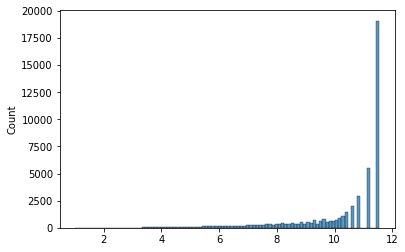

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(tfidf.idf_, )

In [98]:
print(f'IDF map size before = {len(word_to_idf_map)}')

for key in list(word_to_idf_map.keys()):
  tmp = word_to_idf_map.get(key)
  
  if tmp < 5 or tmp > 11:
    word_to_idf_map.pop(key)

print(f'IDF map size after = {len(word_to_idf_map)}')

IDF map size before = 48931
IDF map size after = 23304


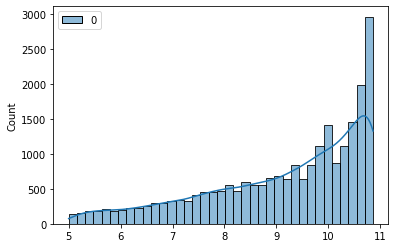

In [99]:
# Distribution of IDFs after processing
sns.histplot(word_to_idf_map.values(), kde=True)

In [100]:
# 4.Remove the low idf value and high idf value words from the train and test data. You can go through each of the
# sentence of train and test data and include only those features(words) which are present in the defined IDF range.

def text_filter_using_idf_set(text_feat, w_set):
    new_feature_list = []
    
    if text_feat is not None:
        for sentence in text_feat:
            out = w_set.intersection(set(sentence.split()))
            
            if bool(out):
              new_feature_list.append(' '.join(out))
            else:
              new_feature_list.append('')
  
    return new_feature_list

In [101]:

from time import time

start = time()
new_essay_X_train = text_filter_using_idf_set(X_train['essay'], set(word_to_idf_map.keys()))
end = time()

print(f'Time required for X_train in seconds = {round(end-start, 3)}')

Time required for X_train in seconds = 2.148


In [102]:
start = time()
new_essay_X_test = text_filter_using_idf_set(X_test['essay'], set(word_to_idf_map.keys()))
end = time()

print(f'Time required for X_test in seconds = {round(end-start, 3)}')

Time required for X_test in seconds = 0.926


In [103]:
len(X_train['essay'])

76473

In [104]:
# 5. Perform tokenization on the modified text data same as you have done for previous model.
# Tokenize text feature in X_train & X_test
tf_idf_pad_train, word_ind_tr = tokenize_text(new_essay_X_train)
tf_idf_pad_test, word_ind_te = tokenize_text(new_essay_X_test)

# Vocab size variable - tf_idf_pad_train
v_size_train = len(word_ind_tr) + 1
v_size_test = len(word_ind_te) + 1

# Output the results of our work
print("\nPadded X_train sequences:\n", tf_idf_pad_train[0])
print("\nPadded training shape:", tf_idf_pad_train.shape)
print("Padded test shape:", tf_idf_pad_test.shape)


Padded X_train sequences:
 [ 331  957  852  563  654   41   63  205  353  855  286  415 1172  929
 2442   43    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    

In [105]:
# create a weight matrix for words in training docs
def create_weight_matrix_tfidf(vocab_size, word_dict):
  embedding_matrix = zeros((vocab_size, 300))
  
  for word, i in word_dict:
    embedding_vector = embeddings_index.get(word)
    
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector
    
  return embedding_matrix

tfidf_emb_mat_train = create_weight_matrix_tfidf(v_size_train, word_ind_tr.items())
tfidf_emb_mat_test = create_weight_matrix_tfidf(v_size_test, word_ind_te.items())

print(f'emb_mat_train = {tfidf_emb_mat_train[1]}')

emb_mat_train = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [106]:
from keras.layers import Embedding
from keras.initializers import he_normal
from keras.regularizers import l2

# Input - 1
input1 = keras.Input(shape=(350,), name = 'Text input - TF-IDF')

# With Embedding() we are converting 
x1 = Embedding(v_size_train, 300, weights = [tfidf_emb_mat_train], input_length = maxlen, trainable = False)(input1)
x1 = keras.layers.LSTM(512)(x1)
x1 = keras.layers.Flatten()(x1)

# Input - 2
input2 = Input(shape=(1,), name = 'school state input - TF-IDF')
x2 = Embedding(input_dim = 51, output_dim = 50)(input2)
x2 = Flatten()(x2)

# Input - 3
input3 = Input(shape=(1,), name = 'teacher prev input - TF-IDF')
x3 = Embedding(input_dim = 5, output_dim = 5)(input3)
x3 = Flatten()(x3)

# Input - 4
input4 = Input(shape=(1,), name = 'project grade input - TF-IDF')
x4 = Embedding(input_dim = 4, output_dim = 4)(input4)
x4 = Flatten()(x4)

# Input - 5
input5 = Input(shape=(1,), name = 'clean categories input - TF-IDF')
x5 = Embedding(input_dim = 51, output_dim = 50)(input5)
x5 = Flatten()(x5)

# Input - 6
input6 = Input(shape=(1,), name = 'clean subcategories input - TF-IDF')
x6 = Embedding(input_dim = 393, output_dim = 50)(input6)
x6 = Flatten()(x6)

# Input - 7
input7 = Input(shape=(2,), name = 'numeric inputs - 2 features - TF-IDF')
x7 = keras.layers.Dense(16, activation = 'relu', kernel_initializer = he_normal(), kernel_regularizer = l2(0.0001))(input7) # 

In [107]:
from tensorflow.python.keras.callbacks import TensorBoard, ModelCheckpoint
from time import time

concat = keras.layers.Concatenate()([x1,x2,x3,x4,x5,x6,x7])

x = keras.layers.Dense(256, activation = 'relu')(concat)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(512, activation = 'relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(64, activation = 'relu')(x)
x = keras.layers.Dropout(0.5)(x)
output = keras.layers.Dense(2, activation = 'softmax')(x)

# create model with seven inputs
model_idf = keras.Model([input1, input2, input3, input4, input5, input6, input7], output)

tensorboard_idf = TensorBoard(log_dir='/content/drive/MyDrive/AppliedAI/Assignments/LSTM_Assignment/lstm_model_2/{}'.format(time()))

In [108]:
model_idf.compile(loss = 'categorical_crossentropy', 
              optimizer = keras.optimizers.Adam(learning_rate=0.0006, decay = 1e-4), 
              metrics = ['accuracy', auroc])

#print(model.summary())

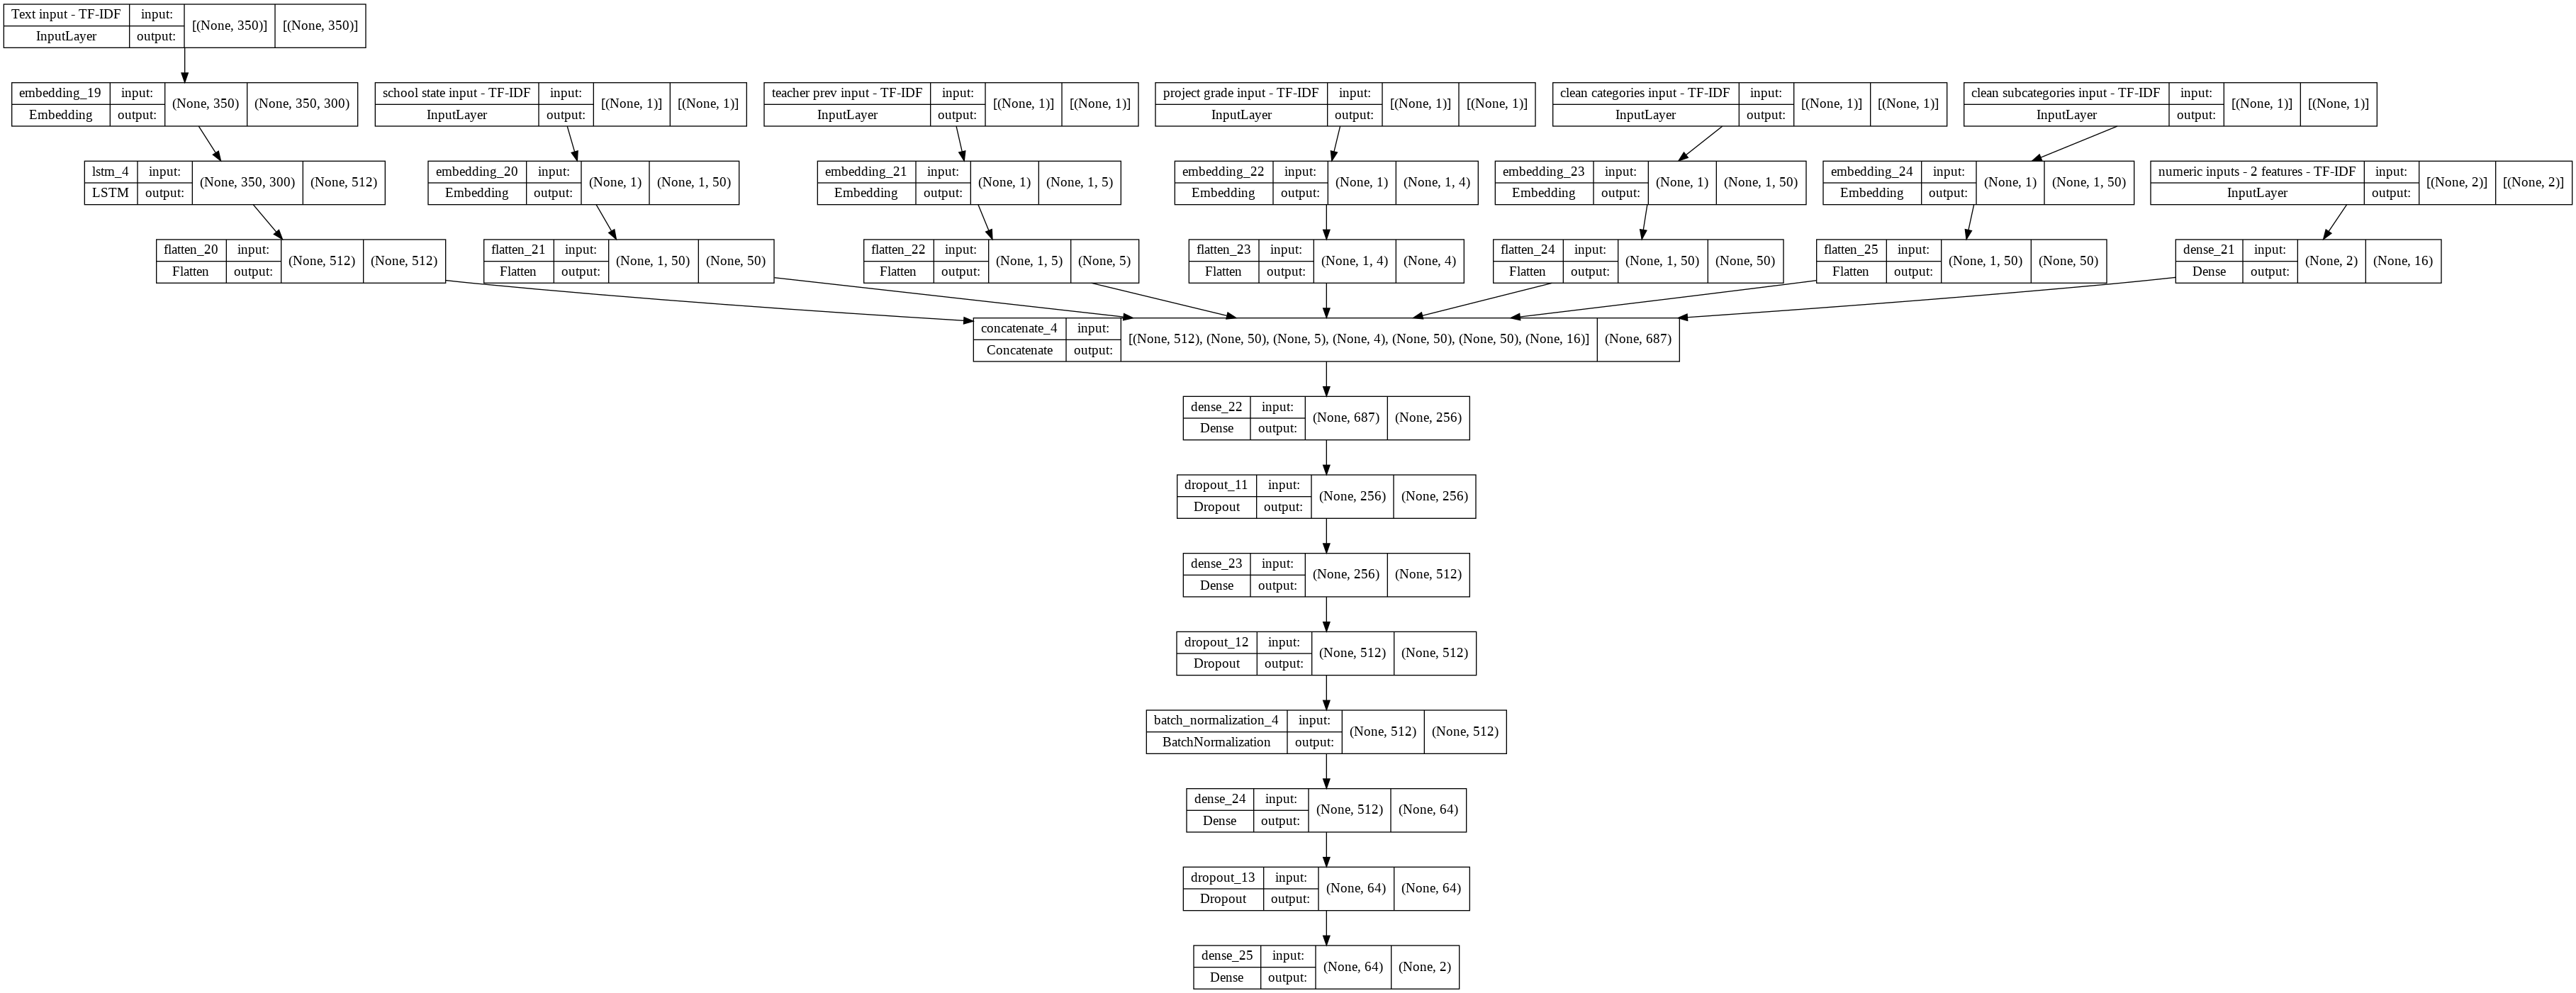

In [109]:
from keras.utils.vis_utils import plot_model

plot_model(model_idf, to_file='/content/drive/MyDrive/AppliedAI/Assignmentsmodel_2.png', show_shapes=True, show_layer_names=True)

In [ ]:
filepath="/content/drive/MyDrive/AppliedAI/Assignments/LSTM_Assignment/lstm_assign_model_2.hdf5"

checkpoint_idf = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint_idf,tensorboard_idf]

model_idf.fit(x = [tf_idf_pad_train, school_state_enc, teacher_pre_enc, project_grade_enc,clean_categories_enc, clean_subcategories_enc, 
           num_feat_concat], y = y_train, epochs = 50, verbose = 1, batch_size = 256,
           validation_data = ([tf_idf_pad_test, school_state_enc_test, teacher_pre_enc_test, project_grade_enc_test,clean_categories_enc_test, 
                    clean_subcategories_enc_test, num_feat_concat_test], y_test),
           callbacks = callbacks_list)

In [ ]:
%tensorboard --logdir '/content/drive/MyDrive/AppliedAI/Assignments/LSTM_Assignment/lstm_model_2/'

# <font color='red'> Model-3 </font>

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png

In [ ]:
#in this model you can use the text vectorized data from model1 
#for other than text data consider the following steps
# you have to perform one hot encoding of ceeeategorical features. You can use onehotencoder() or countvectorizer() for the same.
# Stack up standardised numerical features and all the one hot encoded categorical features
#the input to conv1d layer is 3d, you can convert your 2d data to 3d using np.newaxis
# Note - deep learning models won't work with sparse features, you have to convert them to dense features before fitting in the model.

In [110]:
def get_categorical(y_train, number_of_unique_classes):
    Y_train = []

    for class_ in y_train:
        class__ = np_utils.to_categorical(class_, number_of_unique_classes) 
        Y_train.append(class__)
        
    Y_train = np.array(Y_train)

    return Y_train

In [111]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoder(feature):
  ohe = OneHotEncoder(drop='first').fit_transform(feature)
  #X_train = X_train.toarray()
  return ohe.toarray()

In [112]:
ohe_school_state = one_hot_encoder(X_train[['school_state']])
ohe_teacher_prefix = one_hot_encoder(X_train[['teacher_prefix']])
ohe_project_grade = one_hot_encoder(X_train[['project_grade_category']])
ohe_clean_cat = one_hot_encoder(X_train[['clean_categories']])
ohe_clean_subcat = one_hot_encoder(X_train[['clean_subcategories']])

In [113]:
ohe_school_state_test = one_hot_encoder(X_test[['school_state']])
ohe_teacher_prefix_test = one_hot_encoder(X_test[['teacher_prefix']])
ohe_project_grade_test = one_hot_encoder(X_test[['project_grade_category']])
ohe_clean_cat_test = one_hot_encoder(X_test[['clean_categories']])
ohe_clean_subcat_test = one_hot_encoder(X_test[['clean_subcategories']])

In [114]:
other_than_text = np.concatenate((ohe_school_state, 
                                  ohe_teacher_prefix, 
                                  ohe_project_grade, 
                                  ohe_clean_cat, 
                                  ohe_clean_subcat, 
                                  num_feat_concat), 
                                  axis=1)

In [115]:
other_than_text_test = np.concatenate((ohe_school_state_test, 
                                  ohe_teacher_prefix_test, 
                                  ohe_project_grade_test, 
                                  ohe_clean_cat_test, 
                                  ohe_clean_subcat_test, 
                                  num_feat_concat_test), 
                                  axis=1)

In [116]:
print(f'other_than_text.shape = {other_than_text.shape}')
print(f'other_than_text_test = {other_than_text_test.shape}')

other_than_text.shape = (76473, 499)
other_than_text_test = (32775, 469)


In [ ]:
from scipy.sparse import hstack

X_train_real = X_train
X_test_real = X_test

X_train_tmp = hstack((ohe_school_state, ohe_teacher_prefix, ohe_project_grade, ohe_clean_cat, ohe_clean_subcat, num_feat_concat))
X_test_tmp = hstack((ohe_school_state_test, ohe_teacher_prefix_test, ohe_project_grade_test, ohe_clean_cat_test, ohe_clean_subcat_test, num_feat_concat_test))

print(f'X_train_real.shape = {X_train_real.shape}')
print(f'X_test_real.shape = {X_test_real.shape}')

print(f'X_train_tmp.shape = {X_train_tmp.shape}')
print(f'X_test_tmp.shape = {X_test_tmp.shape}')


ValueError: ignored

In [117]:
# Reshape inputs as Convolution layers expects 3D input
X_train_tmp = np.resize(other_than_text,new_shape=(other_than_text.shape[0],other_than_text.shape[1],1))

X_test_tmp = np.resize(other_than_text_test,new_shape=(other_than_text_test.shape[0],other_than_text.shape[1],1))

print(f'New X_train_tmp.shape = {X_train_tmp.shape}')
print(f'New X_test_tmp.shape = {X_test_tmp.shape}')

New X_train_tmp.shape = (76473, 499, 1)
New X_test_tmp.shape = (32775, 499, 1)


In [121]:
from keras.layers.convolutional import Conv2D,Conv1D

# Input - 1
input1 = keras.Input(shape=(350,), name = 'Text input - model 3')

# With Embedding() we are converting 
x1 = Embedding(vocab_size_train, 300, weights = [emb_mat_train], input_length = maxlen, trainable = False)(input1)
x1 = keras.layers.LSTM(512)(x1)
x1 = keras.layers.Flatten()(x1)

# input 2
input2 = Input(shape=(X_train_tmp.shape[1],1))
x2 = Conv1D(filters=128,kernel_size=3,strides=1,padding='same')(input2)
x2 = Conv1D(filters=64,kernel_size=3,strides=1,padding='same')(x2)
x2 = Flatten()(x2)

In [122]:
from keras.initializers import he_normal
from keras.regularizers import l2

# merging both the inputs
concat = keras.layers.concatenate([x1,x2])

x = Dense(512, kernel_initializer=he_normal(), kernel_regularizer=l2(0.0001))(concat)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.LeakyReLU()(x)

x = keras.layers.Dense(256,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.LeakyReLU()(x)

x = keras.layers.Dense(128,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = keras.layers.LeakyReLU()(x)

output = Dense(2, activation = 'softmax')(x)
 
# create model with two inputs
model = keras.Model([input1,input2], output)

tensorboard_cnn = TensorBoard(log_dir='/content/drive/MyDrive/AppliedAI/Assignments/LSTM_Assignment/lstm_model_3/{}'.format(time()))

model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate = 0.0006, decay = 1e-4), metrics = ['accuracy', auroc])
#model.load_weights(filepath)

#print(model.summary())

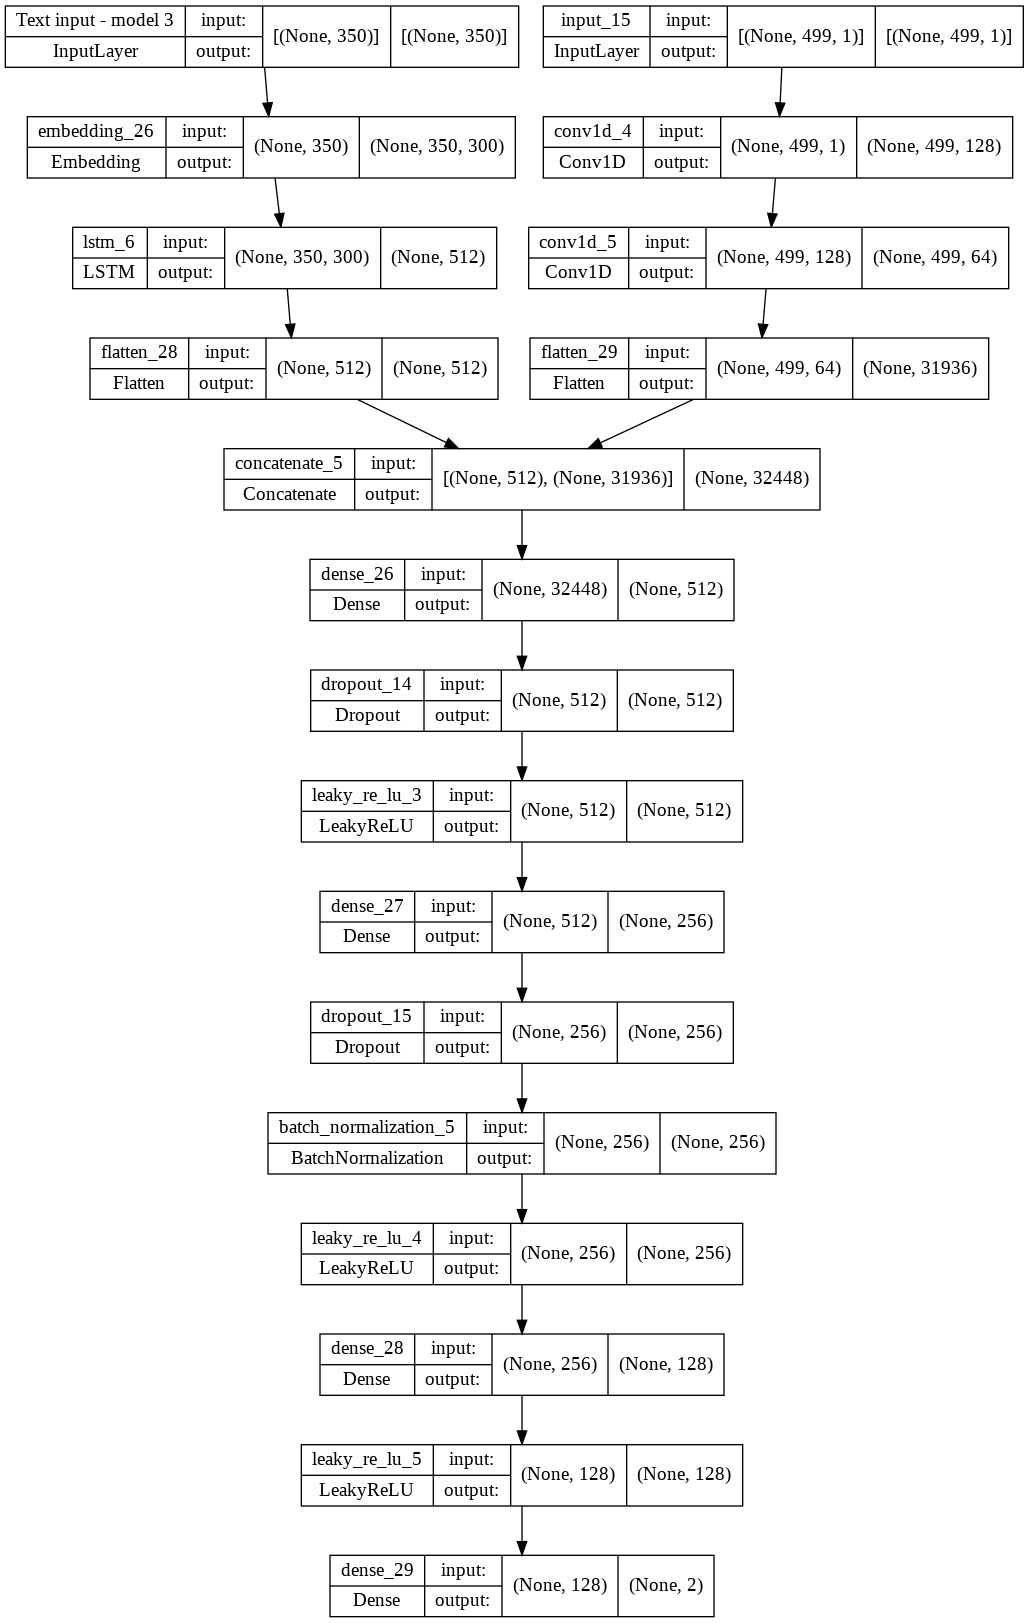

In [123]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='/content/drive/MyDrive/AppliedAI/Assignmentsmodel_3.png', show_shapes=True, show_layer_names=True)

In [119]:
X_test_tmp.shape

(32775, 499, 1)

In [ ]:
filepath="/content/drive/MyDrive/AppliedAI/Assignments/LSTM_Assignment/lstm_assign_model_3.hdf5"

checkpoint_cnn = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint_cnn,tensorboard_cnn]

model.fit([train_padded_docs, X_train_tmp], y_train, epochs=50, verbose=1, batch_size=256, 
           callbacks = callbacks_list, validation_data=([test_padded_docs, X_test_tmp], y_test))

Epoch 1/50
299/299 [==============================] - ETA: 0s - loss: 0.5852 - accuracy: 0.8450 - auroc: 0.5608
Epoch 00001: val_accuracy improved from -inf to 0.84857, saving model to /content/drive/MyDrive/AppliedAI/Assignments/LSTM_Assignment/lstm_assign_model_3.hdf5
299/299 [==============================] - 131s 396ms/step - loss: 0.5852 - accuracy: 0.8450 - auroc: 0.5608 - val_loss: 0.5918 - val_accuracy: 0.8486 - val_auroc: 0.4929
Epoch 2/50
299/299 [==============================] - ETA: 0s - loss: 0.5191 - accuracy: 0.8485 - auroc: 0.5910
Epoch 00002: val_accuracy did not improve from 0.84857
299/299 [==============================] - 115s 385ms/step - loss: 0.5191 - accuracy: 0.8485 - auroc: 0.5910 - val_loss: 0.5216 - val_accuracy: 0.8486 - val_auroc: 0.4904
Epoch 3/50
299/299 [==============================] - ETA: 0s - loss: 0.4979 - accuracy: 0.8485 - auroc: 0.6012
Epoch 00003: val_accuracy did not improve from 0.84857
299/299 [==============================] - 115s 385ms

In [ ]:
%tensorboard --logdir '/content/drive/MyDrive/AppliedAI/Assignments/LSTM_Assignment/lstm_model_3/'